# Medium Article EinSum 101

In [1]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt
import time

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

# Define the seed so that results can be reproduced
seed = 11

# Generate synthetic data for the Article Einstein sumation

In [3]:
nxt=20; mxt=10000;
x,y=dt.make_regression(n_samples=mxt,
                         n_features=nxt,
                         noise=1.,
                         random_state=seed)

In [4]:
print(x[:5])

[[ 0.70337691  0.2969772  -0.78225739  0.17799388  0.79800857 -0.23823717
  -2.23584554  0.12770769 -2.62683357  1.61649632 -0.17925845 -0.20374913
   0.40714217  0.4300291  -0.86256594 -0.93513788  1.491888   -0.80705578
  -1.47636098  0.2025032 ]
 [ 0.46297083  0.7633453   1.83827058  0.08042244 -1.24589307  1.29201206
  -1.20765005  0.09046335 -2.23122465  0.70743713  0.27973486  1.08770228
  -0.79272106  0.1253807   0.30836571 -1.66582064  0.13295684 -2.01710836
  -0.3495766   0.43982148]
 [ 0.69465318 -0.30947095  2.0955184  -0.1740145   0.46141935 -0.68217633
  -0.28336858  0.44160374  1.03420176 -0.22729636 -0.88705069  0.99080446
   0.4426358  -0.25869569 -0.55067707 -0.92172586 -0.07936935 -0.15204604
  -0.53820162 -0.1586966 ]
 [ 1.21037668  0.54382535 -1.04028118  1.21234078 -0.33732755 -1.05652187
   0.5473492  -0.44086037  0.59071511  0.29256046  0.21599549  0.15820267
  -0.62156586  0.77652336  0.88397169  0.5715961   0.00892571  0.09668563
  -1.83566924 -0.17212756]
 [-0

In [5]:
print(y[:5])

[ -32.05307591  -97.89781786   57.19105773  163.73831492 -264.61844731]


In [6]:
def sigmoid(z):
    s = 1./(1.+np.exp(-z))
    return s

In [7]:
def cost_Class(X, Y, w, b, lr):
    # FORWARD PROPAGATION (FROM X TO COST)
    _,m = X.shape
    # compute activation
    hypotesis = np.dot(w.T,X)+b
    A = sigmoid(hypotesis)
    # loss
    loss=(Y*np.log(A)+(1.-Y)*np.log(1.-A))
    gradient = np.sum(np.dot(loss, X.T), axis=1)/m
    w = w - lr*gradient
    # compute cost
    cost1 = -1/m * np.sum(loss, axis=1)     #
    return cost1,w

In [8]:
nap1=1; map1=mxt;
nya=2; mya=nap1;
mba=1;
np.random.seed(1)

In [9]:
w, b = np.random.randn(nxt,mba), np.random.randn(mba,mxt)
xT=np.transpose(x)
yT=np.transpose(y)
print(w.shape,x.shape)
#X, Y = np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
#%timeit cost_Class(xT, yT, w, b, 0.001)
cost_Class(xT, yT, w, b, 0.001)

(20, 1) (10000, 20)


(array([66.57731035]),
 array([[ 1.64403522],
        [-0.59206656],
        [-0.5084819 ],
        [-1.05327877],
        [ 0.88509749],
        [-2.28184884],
        [ 1.76450162],
        [-0.74151704],
        [ 0.33872895],
        [-0.22968052],
        [ 1.48179779],
        [-2.04045085],
        [-0.30272735],
        [-0.3643645 ],
        [ 1.1534593 ],
        [-1.08020141],
        [-0.15273835],
        [-0.85816856],
        [ 0.0619036 ],
        [ 0.60250507]]))

In [10]:
Jx=cost_Class(xT, yT, w, b, 0.001)
# -1/m*  np.sum((  Y  *   np.log(A)  +  (1.-Y)     *       np.log(1.-A))          ,    axis=1)
#        A^Y             +             (1-A)^(1-Y)
# -- Entropy:   - q ln(p) - p ln(q)
# -- Que proviene de aqui ..  - P = -  (p^q * q^p)
print ("Cost = " + str(Jx))

Cost = (array([66.57731035]), array([[ 1.64403522],
       [-0.59206656],
       [-0.5084819 ],
       [-1.05327877],
       [ 0.88509749],
       [-2.28184884],
       [ 1.76450162],
       [-0.74151704],
       [ 0.33872895],
       [-0.22968052],
       [ 1.48179779],
       [-2.04045085],
       [-0.30272735],
       [-0.3643645 ],
       [ 1.1534593 ],
       [-1.08020141],
       [-0.15273835],
       [-0.85816856],
       [ 0.0619036 ],
       [ 0.60250507]]))


# Using EinsteinSum

In [11]:
def cost_Ein(X, Y, w , b, lr):
    # Forward propagation (from x to J)
    _,m = X.shape
    #print(X.shape)
    # We can transpose simply changing ij by ji ..
    hypothesis = np.einsum('ji,jk->ik',w,X)+b
    # compute activation
    A = sigmoid(hypothesis)
    #print(A)
    # loss
    loss=(Y*np.log(A)+(1.-Y)*np.log(1.-A))
    #print(loss)
    gradient = np.einsum('ij, ij -> ', loss, X)/m
    #print(gradient)
    w = w - lr*gradient
    # compute cost
    cost1 = -1/m  *  np.einsum('ij->',loss)     #
    return cost1, w

In [12]:
# -- Einstein Sum:
def opt_Ein(X, Y, w, b, lr, epochs):
    _,m = X.shape
    #print(X.shape)
    errors = np.zeros(epochs)
    for i in range(epochs):
        errors[i], upd_w = cost_Ein(X, Y, w, b, lr)
        w = upd_w
    return w, errors

In [13]:
## -- Classical:
def opt_Class(X, Y, w, b, lr, epochs):
    _,m = X.shape
    errors = np.zeros(epochs)
    for i in range(epochs):
        errors[i], upd_w = cost_Class(X, Y, w, b, lr)
        w = upd_w
    return w, errors

In [14]:
%timeit cost_Ein(xT, yT, w, b, 0.001)

542 µs ± 67.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%timeit cost_Class(xT, yT, w, b, 0.001)

456 µs ± 24.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
Jx_Ein=cost_Ein(xT, yT, w, b, 0.001)
print ("Cost = " + str(Jx_Ein))

Cost = (66.57731034801915, array([[ 1.64403522],
       [-0.59206656],
       [-0.5084819 ],
       [-1.05327877],
       [ 0.88509749],
       [-2.28184884],
       [ 1.76450162],
       [-0.74151704],
       [ 0.33872895],
       [-0.22968052],
       [ 1.48179779],
       [-2.04045085],
       [-0.30272735],
       [-0.3643645 ],
       [ 1.1534593 ],
       [-1.08020141],
       [-0.15273835],
       [-0.85816856],
       [ 0.0619036 ],
       [ 0.60250507]]))


In [17]:
Jx_Class=cost_Class(xT, yT, w, b, 0.001)
print ("Cost = " + str(Jx_Class))

Cost = (array([66.57731035]), array([[ 1.64403522],
       [-0.59206656],
       [-0.5084819 ],
       [-1.05327877],
       [ 0.88509749],
       [-2.28184884],
       [ 1.76450162],
       [-0.74151704],
       [ 0.33872895],
       [-0.22968052],
       [ 1.48179779],
       [-2.04045085],
       [-0.30272735],
       [-0.3643645 ],
       [ 1.1534593 ],
       [-1.08020141],
       [-0.15273835],
       [-0.85816856],
       [ 0.0619036 ],
       [ 0.60250507]]))


In [18]:
%timeit opt_Ein(xT, yT, w, b, 0.001, 1000)

538 ms ± 63.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%timeit opt_Class(xT, yT, w, b, 0.001, 1000)

393 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
#### -----
def putStyle(sFont,syT,top1,R1):
    import matplotlib as mpl
    import matplotlib.style as style
    style.available

    # General plot parameters
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = sFont
    mpl.rcParams['axes.linewidth'] = 4
    mpl.rcParams['axes.spines.bottom'] = top1
    mpl.rcParams['axes.spines.right'] = R1
    mpl.rcParams['xtick.major.size'] = 10
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.size'] = 10
    mpl.rcParams['ytick.major.width'] = syT
    mpl.rcParams['lines.linewidth']= 3
    mpl.rcParams["figure.figsize"] = (8,8)

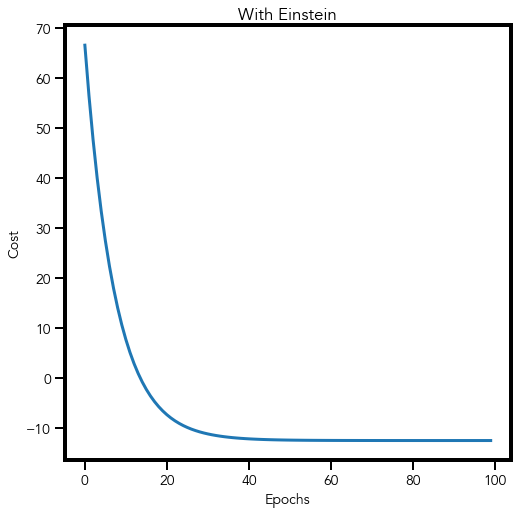

In [23]:
## --- Style --
putStyle(14,2,True,True)

thetasEin, errorsEin = opt_Ein(xT, yT, w, b, lr=0.001, epochs=100)
plt.plot(errorsEin)
plt.title('With Einstein')
plt.xlabel('Epochs')
plt.ylabel('Cost')
#plt.savefig('plot_Ein_v1.png')

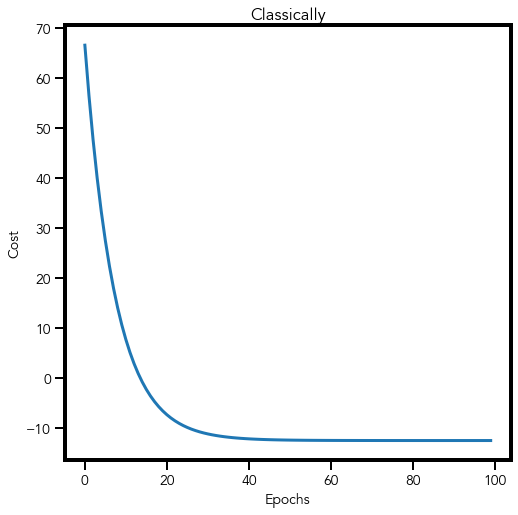

In [24]:
## --- Style --
putStyle(14,2,True,True)

thetasClass, errorsClass = opt_Class(xT, yT, w, b, lr=0.001, epochs=100)
plt.plot(errorsClass)
plt.title('Classically')
plt.xlabel('Epochs')
plt.ylabel('Cost')
#plt.savefig('plot_Class_v1.png')